In [76]:
import pandas as pd
import numpy as np

In [77]:
df = pd.read_csv('train.csv')

In [78]:
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [80]:
len(df['PassengerId'].unique()), len(df['Cabin'].unique()), len(df['Name'].unique())

(8693, 6561, 8474)

In [81]:
# Cannot extract much information from PassengerId, Cabin and Name without NLP. So we drop them out.
df.drop(['PassengerId', 'Cabin', 'Name'], axis=1, inplace=True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


In [83]:
len(df['HomePlanet'].unique()), len(df['CryoSleep'].unique()), len(df['Destination'].unique()), len(df['VIP'].unique())

(4, 3, 4, 3)

> All the data can be label encoded in order to extract some information from the data.

In [84]:
# First we label encode our target column 'Transported'.
from sklearn.preprocessing import LabelEncoder
transported_encoded = LabelEncoder().fit_transform(df['Transported'])

In [85]:
df['Transported'] = transported_encoded

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 747.2+ KB


In [87]:
# Encoding our dataset using Label Encoder and Handling Null Values simulataneously
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 747.2+ KB


## Null Value Handling using Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

### 1. Handling Null Values of HomePlanet column

In [89]:
df1 = df.copy(deep=True)

In [90]:
for label in df1.columns:
  if label == 'HomePlanet':
    continue
  data = LabelEncoder().fit_transform(df1[label])
  df1[label] = data

In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HomePlanet    8492 non-null   object
 1   CryoSleep     8693 non-null   int64 
 2   Destination   8693 non-null   int64 
 3   Age           8693 non-null   int64 
 4   VIP           8693 non-null   int64 
 5   RoomService   8693 non-null   int64 
 6   FoodCourt     8693 non-null   int64 
 7   ShoppingMall  8693 non-null   int64 
 8   Spa           8693 non-null   int64 
 9   VRDeck        8693 non-null   int64 
 10  Transported   8693 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 747.2+ KB


In [92]:
dfHP = df1[df1['HomePlanet'].isnull()==False]
dfHPNull = df1[df1['HomePlanet'].isnull()]

In [93]:
X_train = dfHP.drop('HomePlanet', axis=1)
y_train = dfHP['HomePlanet']
X_test = dfHPNull.drop('HomePlanet', axis=1)

In [94]:
rf_model_HP = RandomForestClassifier()
rf_model_HP.fit(X_train, y_train)
y_preds = rf_model_HP.predict(X_test)

In [95]:
y_preds

array(['Earth', 'Europa', 'Europa', 'Mars', 'Europa', 'Mars', 'Europa',
       'Mars', 'Earth', 'Europa', 'Mars', 'Earth', 'Earth', 'Europa',
       'Mars', 'Europa', 'Earth', 'Mars', 'Earth', 'Earth', 'Europa',
       'Europa', 'Mars', 'Earth', 'Earth', 'Earth', 'Europa', 'Europa',
       'Europa', 'Earth', 'Earth', 'Earth', 'Earth', 'Earth', 'Earth',
       'Earth', 'Earth', 'Earth', 'Earth', 'Mars', 'Mars', 'Earth',
       'Earth', 'Earth', 'Earth', 'Mars', 'Mars', 'Europa', 'Mars',
       'Earth', 'Earth', 'Earth', 'Europa', 'Mars', 'Mars', 'Earth',
       'Earth', 'Europa', 'Earth', 'Earth', 'Mars', 'Mars', 'Earth',
       'Earth', 'Earth', 'Earth', 'Earth', 'Earth', 'Earth', 'Earth',
       'Earth', 'Earth', 'Earth', 'Europa', 'Earth', 'Mars', 'Earth',
       'Mars', 'Europa', 'Europa', 'Europa', 'Earth', 'Earth', 'Europa',
       'Earth', 'Europa', 'Earth', 'Europa', 'Earth', 'Mars', 'Mars',
       'Mars', 'Earth', 'Earth', 'Earth', 'Earth', 'Mars', 'Earth',
       'Mars', 'Euro

In [96]:
len(y_preds)

201

In [97]:
len(dfHPNull['HomePlanet'])

201

In [98]:
len(X_test)

201

In [99]:
df.loc[df['HomePlanet'].isnull(), 'HomePlanet'] = y_preds

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 747.2+ KB


### 2. Handling Null Values of CryoSleep Column

In [101]:
df1 = df.copy(deep=True)
for label in df1.columns:
  if label == 'CryoSleep':
    continue
  data = LabelEncoder().fit_transform(df1[label])
  df1[label] = data

In [102]:
dfCryo = df1[df1['CryoSleep'].isnull()==False]
dfCryoNull = df1[df1['CryoSleep'].isnull()]

In [103]:
X_train = dfCryo.drop('CryoSleep', axis=1)
y_train = dfCryo['CryoSleep']
X_test = dfCryoNull.drop('CryoSleep', axis=1)

In [104]:
len(X_train), len(y_train), len(X_test)

(8476, 8476, 217)

In [105]:
rf_model_cryo = RandomForestClassifier()
rf_model_cryo.fit(X_train, y_train.astype('bool'))

RandomForestClassifier()

In [106]:
y_preds = rf_model_cryo.predict(X_test)

In [107]:
y_preds

array([ True, False, False,  True, False,  True, False,  True, False,
        True, False, False, False,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False,  True,
        True, False, False,  True,  True,  True,  True, False,  True,
       False, False,  True, False, False, False, False,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True, False,  True, False, False,  True,
        True, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True,  True, False, False,  True, False,  True,
       False, False, False,  True,  True,  True,  True, False,  True,
       False, False,

In [108]:
df.loc[df['CryoSleep'].isnull(), 'CryoSleep'] = y_preds

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 747.2+ KB


In [110]:
df['CryoSleep'] = df['CryoSleep'].astype(bool)

### 3. Handling Null Values of Destination Column

In [111]:
df1 = df.copy(deep=True)
for label in df1.columns:
  if label == 'Destination':
    continue
  data = LabelEncoder().fit_transform(df1[label])
  df1[label] = data
dfDest = df1[df1['Destination'].isnull()==False]
dfDestNull = df1[df1['Destination'].isnull()]
X_train = dfDest.drop('Destination', axis=1)
y_train = dfDest['Destination']
X_test = dfDestNull.drop('Destination', axis=1)
rf_model_Dest = RandomForestClassifier()
rf_model_Dest.fit(X_train, y_train)
y_preds = rf_model_Dest.predict(X_test)

In [112]:
y_preds

array(['TRAPPIST-1e', 'TRAPPIST-1e', 'PSO J318.5-22', 'TRAPPIST-1e',
       'TRAPPIST-1e', '55 Cancri e', 'TRAPPIST-1e', '55 Cancri e',
       'TRAPPIST-1e', 'PSO J318.5-22', 'TRAPPIST-1e', 'TRAPPIST-1e',
       'TRAPPIST-1e', '55 Cancri e', 'TRAPPIST-1e', 'TRAPPIST-1e',
       'TRAPPIST-1e', 'TRAPPIST-1e', 'TRAPPIST-1e', 'TRAPPIST-1e',
       'TRAPPIST-1e', 'TRAPPIST-1e', 'TRAPPIST-1e', 'TRAPPIST-1e',
       'TRAPPIST-1e', 'TRAPPIST-1e', 'TRAPPIST-1e', 'TRAPPIST-1e',
       'TRAPPIST-1e', 'TRAPPIST-1e', '55 Cancri e', 'TRAPPIST-1e',
       'TRAPPIST-1e', 'TRAPPIST-1e', 'TRAPPIST-1e', 'TRAPPIST-1e',
       'TRAPPIST-1e', 'TRAPPIST-1e', 'TRAPPIST-1e', 'TRAPPIST-1e',
       'TRAPPIST-1e', 'TRAPPIST-1e', 'TRAPPIST-1e', 'TRAPPIST-1e',
       'TRAPPIST-1e', '55 Cancri e', 'TRAPPIST-1e', 'TRAPPIST-1e',
       'TRAPPIST-1e', 'TRAPPIST-1e', 'TRAPPIST-1e', 'TRAPPIST-1e',
       'TRAPPIST-1e', 'TRAPPIST-1e', 'TRAPPIST-1e', 'TRAPPIST-1e',
       'TRAPPIST-1e', 'TRAPPIST-1e', 'TRAPPIST-1e', 'TRAPP

In [113]:
df.loc[df['Destination'].isnull(), 'Destination'] = y_preds

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   int64  
dtypes: bool(1), float64(6), int64(1), object(3)
memory usage: 687.8+ KB


### 4. Handling Null Values of Age

In [115]:
df1 = df.copy(deep=True)
for label in df1.columns:
  if label == 'Age':
    continue
  data = LabelEncoder().fit_transform(df1[label])
  df1[label] = data
dfAge = df1[df1['Age'].isnull()==False]
dfAgeNull = df1[df1['Age'].isnull()]
X_train = dfAge.drop('Age', axis=1)
y_train = dfAge['Age']
X_test = dfAgeNull.drop('Age', axis=1)
rf_model_Age = RandomForestRegressor()
rf_model_Age.fit(X_train, y_train)
y_preds = rf_model_Age.predict(X_test)

In [116]:
y_preds = np.round(y_preds)
y_preds

array([34., 29., 20., 40., 39., 33., 30., 28., 34., 31., 31., 22., 32.,
       20., 37., 33., 26., 37.,  4., 40., 37., 30., 31., 38., 39., 26.,
       26., 34., 39., 31., 33., 32., 30., 36., 30., 36., 28., 29., 45.,
       26., 35., 22.,  8., 33., 21., 33., 38., 29., 22., 31., 30., 25.,
       36., 23., 28., 25., 22., 26., 33., 30., 23., 28., 28., 25., 25.,
       37., 28., 25., 28., 26., 28., 26., 20., 28., 41., 33., 32., 28.,
       33., 31., 23., 28., 33., 33., 29., 33., 22., 26., 28., 33., 26.,
       29., 28., 23., 28., 32., 33., 31., 27., 37., 36., 23., 44., 24.,
       36., 30., 20., 27., 39., 25., 34., 28., 22., 22., 33., 36., 22.,
       33., 22., 22., 34., 22., 28., 39., 28., 39., 28., 25., 33., 24.,
       22., 33., 38., 30., 22., 24., 26., 22., 25., 29., 33., 33., 22.,
       32., 22., 36., 21., 37., 32.,  4., 32., 34., 29., 33., 32., 33.,
       25., 33., 21., 22.,  8., 22., 36., 33., 33., 28., 32., 28., 37.,
       29., 26., 33., 28., 25., 25., 33., 37., 22., 25.])

In [117]:
df.loc[df['Age'].isnull(), 'Age'] = y_preds

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   int64  
dtypes: bool(1), float64(6), int64(1), object(3)
memory usage: 687.8+ KB


### 5. Handling Null Values of VIP

In [119]:
df1 = df.copy(deep=True)
for label in df1.columns:
  if label == 'VIP':
    continue
  data = LabelEncoder().fit_transform(df1[label])
  df1[label] = data
dfVIP = df1[df1['VIP'].isnull()==False]
dfVIPNull = df1[df1['VIP'].isnull()]
X_train = dfVIP.drop('VIP', axis=1)
y_train = dfVIP['VIP']
X_test = dfVIPNull.drop('VIP', axis=1)
rf_model_VIP = RandomForestClassifier()
rf_model_VIP.fit(X_train, y_train.astype(bool))
y_preds = rf_model_VIP.predict(X_test)

In [120]:
y_preds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [121]:
df.loc[df['VIP'].isnull(), 'VIP'] = y_preds

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   int64  
dtypes: bool(1), float64(6), int64(1), object(3)
memory usage: 687.8+ KB


In [123]:
df['VIP'] = df['VIP'].astype(bool)

### 6. Handling Null Values in RoomService Column

In [124]:
df1 = df.copy(deep=True)
for label in df1.columns:
  if label == 'RoomService':
    continue
  data = LabelEncoder().fit_transform(df1[label])
  df1[label] = data
dfRoomService = df1[df1['RoomService'].isnull()==False]
dfRoomServiceNull = df1[df1['RoomService'].isnull()]
X_train = dfRoomService.drop('RoomService', axis=1)
y_train = dfRoomService['RoomService']
X_test = dfRoomServiceNull.drop('RoomService', axis=1)
rf_model_RoomService = RandomForestRegressor()
rf_model_RoomService.fit(X_train, y_train)
y_preds = rf_model_RoomService.predict(X_test)

In [125]:
y_preds = np.round(y_preds)

In [126]:
y_preds

array([   0.,  598.,    0., 2142.,  613.,   32.,    0.,  103.,   64.,
         16.,    0.,  108., 1154.,  338.,  735.,   12.,  439.,  101.,
         96.,    0.,  862., 1127.,    0.,  753.,  118.,    0.,    0.,
        731.,    0.,  576.,  671., 2116.,   23.,   22.,    0., 1687.,
          0.,    0.,  822.,  453.,    0.,  946.,    0.,  296.,  268.,
          0.,   64.,    0.,    0.,   95.,   20.,   21.,    0.,    0.,
        460.,   49.,   28.,  142.,    0.,    0.,    0.,  136.,    0.,
         97.,    0., 1144.,  344.,    0.,    0.,   17.,    0.,    0.,
         21.,  235.,    0.,    0.,    0.,    0.,    0.,  328., 1008.,
        113.,    0.,    0.,    0.,  164.,    0.,  869.,    0., 1088.,
        107.,   97.,   18.,    0.,    0.,   53.,  419.,  183.,    0.,
        218.,  198., 1739.,   51., 1204.,    0.,    0.,   77.,    0.,
         83.,    0.,    0.,  830.,    0.,    0.,    0.,    0.,   43.,
        329.,  108., 1868.,    0.,    0., 1644.,    0.,    0.,    0.,
          0.,    0.,

In [127]:
df.loc[df['RoomService'].isnull(), 'RoomService'] = y_preds

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   int64  
dtypes: bool(2), float64(6), int64(1), object(2)
memory usage: 628.3+ KB


### 7. Handling Null values in FoodCourt Column

In [129]:
df1 = df.copy(deep=True)
for label in df1.columns:
  if label == 'FoodCourt':
    continue
  data = LabelEncoder().fit_transform(df1[label])
  df1[label] = data
dfFoodCourt = df1[df1['FoodCourt'].isnull()==False]
dfFoodCourtNull = df1[df1['FoodCourt'].isnull()]
X_train = dfFoodCourt.drop('FoodCourt', axis=1)
y_train = dfFoodCourt['FoodCourt']
X_test = dfFoodCourtNull.drop('FoodCourt', axis=1)
rf_model_FoodCourt = RandomForestRegressor()
rf_model_FoodCourt.fit(X_train, y_train)
y_preds = rf_model_FoodCourt.predict(X_test)

In [130]:
y_preds = np.round(y_preds)

In [131]:
df.loc[df['FoodCourt'].isnull(), 'FoodCourt'] = y_preds

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   int64  
dtypes: bool(2), float64(6), int64(1), object(2)
memory usage: 628.3+ KB


### 8. Handling Null Values in ShoppingMall Column

In [133]:
df1 = df.copy(deep=True)
for label in df1.columns:
  if label == 'ShoppingMall':
    continue
  data = LabelEncoder().fit_transform(df1[label])
  df1[label] = data
dfShoppingMall = df1[df1['ShoppingMall'].isnull()==False]
dfShoppingMallNull = df1[df1['ShoppingMall'].isnull()]
X_train = dfShoppingMall.drop('ShoppingMall', axis=1)
y_train = dfShoppingMall['ShoppingMall']
X_test = dfShoppingMallNull.drop('ShoppingMall', axis=1)
rf_model_ShoppingMall = RandomForestRegressor()
rf_model_ShoppingMall.fit(X_train, y_train)
y_preds = rf_model_ShoppingMall.predict(X_test)

In [134]:
y_preds = np.round(y_preds)
y_preds

array([0.000e+00, 2.650e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 2.810e+02, 0.000e+00, 6.210e+02, 4.830e+02,
       0.000e+00, 4.420e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 7.660e+02, 5.530e+02, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 4.290e+02, 6.500e+01, 4.000e+02, 8.000e+00,
       1.280e+02, 1.052e+03, 0.000e+00, 0.000e+00, 0.000e+00, 3.300e+01,
       9.800e+01, 0.000e+00, 4.000e+01, 3.100e+02, 0.000e+00, 0.000e+00,
       5.000e+00, 4.510e+02, 0.000e+00, 7.700e+01, 0.000e+00, 7.070e+02,
       0.000e+00, 0.000e+00, 1.400e+01, 0.000e+00, 3.290e+02, 1.790e+02,
       1.280e+02, 0.000e+00, 4.130e+02, 0.000e+00, 3.200e+01, 0.000e+00,
       0.000e+00, 2.700e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 3.300e+01, 6.930e+02, 8.400e+01, 0.000e+00, 1.082e+03,
       4.000e+00, 2.250e+02, 0.000e+00, 1.600e+01, 2.110e+02, 5.800e+01,
       8.530e+02, 8.900e+01, 0.000e+00, 3.200e+01, 

In [135]:
df.loc[df['ShoppingMall'].isnull(), 'ShoppingMall'] = y_preds

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   int64  
dtypes: bool(2), float64(6), int64(1), object(2)
memory usage: 628.3+ KB


### 9. Handling Null Values in Spa Column

In [137]:
df1 = df.copy(deep=True)
for label in df1.columns:
  if label == 'Spa':
    continue
  data = LabelEncoder().fit_transform(df1[label])
  df1[label] = data
dfSpa = df1[df1['Spa'].isnull()==False]
dfSpaNull = df1[df1['Spa'].isnull()]
X_train = dfSpa.drop('Spa', axis=1)
y_train = dfSpa['Spa']
X_test = dfSpaNull.drop('Spa', axis=1)
rf_model_Spa = RandomForestRegressor()
rf_model_Spa.fit(X_train, y_train)
y_preds = rf_model_Spa.predict(X_test)

In [138]:
y_preds = np.round(y_preds)
y_preds

array([4.200e+01, 7.700e+01, 0.000e+00, 0.000e+00, 1.136e+03, 2.040e+02,
       0.000e+00, 5.382e+03, 1.359e+03, 2.750e+02, 0.000e+00, 4.260e+02,
       0.000e+00, 1.228e+03, 0.000e+00, 7.800e+01, 3.100e+01, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.240e+02, 1.650e+02, 2.810e+02,
       0.000e+00, 2.540e+02, 3.090e+02, 0.000e+00, 0.000e+00, 5.130e+02,
       4.700e+01, 0.000e+00, 0.000e+00, 1.690e+03, 5.060e+02, 3.730e+02,
       1.600e+01, 0.000e+00, 3.700e+01, 1.950e+02, 0.000e+00, 9.620e+02,
       4.800e+01, 8.500e+01, 0.000e+00, 1.700e+01, 8.030e+02, 0.000e+00,
       2.400e+01, 1.000e+03, 0.000e+00, 1.150e+03, 1.800e+01, 0.000e+00,
       2.510e+02, 7.120e+02, 0.000e+00, 2.360e+02, 1.220e+02, 0.000e+00,
       1.900e+01, 6.990e+02, 0.000e+00, 6.890e+02, 6.460e+02, 1.699e+03,
       0.000e+00, 0.000e+00, 5.700e+01, 0.000e+00, 0.000e+00, 0.000e+00,
       1.650e+02, 4.900e+02, 8.650e+02, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

In [139]:
df.loc[df['Spa'].isnull(), 'Spa'] = y_preds

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   int64  
dtypes: bool(2), float64(6), int64(1), object(2)
memory usage: 628.3+ KB


### 10. Handling Null Values in VRDeck column

In [141]:
df1 = df.copy(deep=True)
for label in df1.columns:
  if label == 'VRDeck':
    continue
  data = LabelEncoder().fit_transform(df1[label])
  df1[label] = data
dfVRDeck = df1[df1['VRDeck'].isnull()==False]
dfVRDeckNull = df1[df1['VRDeck'].isnull()]
X_train = dfVRDeck.drop('VRDeck', axis=1)
y_train = dfVRDeck['VRDeck']
X_test = dfVRDeckNull.drop('VRDeck', axis=1)
rf_model_VRDeck = RandomForestRegressor()
rf_model_VRDeck.fit(X_train, y_train)
y_preds = rf_model_VRDeck.predict(X_test)

In [142]:
y_preds = np.round(y_preds)
y_preds

array([0.000e+00, 0.000e+00, 0.000e+00, 1.700e+01, 0.000e+00, 9.220e+02,
       0.000e+00, 8.210e+02, 4.020e+02, 0.000e+00, 0.000e+00, 2.900e+01,
       4.200e+01, 0.000e+00, 1.203e+03, 3.900e+01, 2.700e+02, 5.358e+03,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.020e+02,
       1.140e+02, 1.600e+02, 0.000e+00, 1.270e+02, 0.000e+00, 0.000e+00,
       1.020e+02, 0.000e+00, 4.680e+02, 0.000e+00, 0.000e+00, 0.000e+00,
       6.790e+02, 4.720e+02, 7.900e+02, 2.560e+02, 1.540e+02, 0.000e+00,
       1.270e+02, 0.000e+00, 6.100e+01, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.680e+02, 3.140e+02, 1.730e+02, 9.700e+01, 1.143e+03,
       1.510e+02, 1.210e+02, 1.670e+02, 0.000e+00, 3.300e+02, 2.100e+01,
       5.680e+02, 0.000e+00, 4.200e+01, 9.000e+00, 1.190e+02, 0.000e+00,
       0.000e+00, 2.400e+01, 9.150e+02, 3.700e+01, 0.000e+00, 6.000e+00,
       0.000e+00, 1.800e+01, 7.430e+02, 3.000e+00, 1.045e+03, 2.090e+03,
       0.000e+00, 0.000e+00, 0.000e+00, 4.160e+02, 

In [143]:
df.loc[df['VRDeck'].isnull(), 'VRDeck'] = y_preds

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
dtypes: bool(2), float64(6), int64(1), object(2)
memory usage: 628.3+ KB


> The Full dataset's null values has been handled.

## Saving the final dataset for model training

In [145]:
df

HomePlanet  CryoSleep    Destination   Age    VIP  RoomService  \
0        Europa      False    TRAPPIST-1e  39.0  False          0.0   
1         Earth      False    TRAPPIST-1e  24.0  False        109.0   
2        Europa      False    TRAPPIST-1e  58.0   True         43.0   
3        Europa      False    TRAPPIST-1e  33.0  False          0.0   
4         Earth      False    TRAPPIST-1e  16.0  False        303.0   
...         ...        ...            ...   ...    ...          ...   
8688     Europa      False    55 Cancri e  41.0   True          0.0   
8689      Earth       True  PSO J318.5-22  18.0  False          0.0   
8690      Earth      False    TRAPPIST-1e  26.0  False          0.0   
8691     Europa      False    55 Cancri e  32.0  False          0.0   
8692     Europa      False    TRAPPIST-1e  44.0  False        126.0   

      FoodCourt  ShoppingMall     Spa  VRDeck  Transported  
0           0.0           0.0     0.0     0.0            0  
1           9.0          25.0   549.0    44.0            1  
2        3576.0           0.0  6715.0    49.0            0  
3        1283.0         371.0  3329.0   193.0            0  
4          70.0         151.0   565.0     2.0            1  
...         ...           ...     ...     ...          ...  
8688     6819.0           0.0  1643.0    74.0            0  
8689        0.0           0.0     0.0     0.0            0  
8690        0.0        1872.0     1.0     0.0            1  
8691     1049.0           0.0   353.0  3235.0            0  
8692     4688.0           0.0     0.0    12.0            1  

[8693 rows x 11 columns]

In [146]:
df.to_csv('trainingDataBTeam.csv')

# Models for Predictions

In [147]:
# Encoding our dataset and splitting it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
dtypes: bool(2), float64(6), int64(1), object(2)
memory usage: 628.3+ KB


In [148]:
# homePlanet = LabelEncoder().fit_transform(df['HomePlanet'])
# destination = LabelEncoder().fit_transform(df['Destination'])
# print(destination.classes_)

In [149]:
df['HomePlanet'] = homePlanet
df['Destination'] = destination

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   int64  
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   int64  
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
dtypes: bool(2), float64(6), int64(3)
memory usage: 628.3 KB


In [151]:
X = df.drop('Transported', axis=1)
y = df['Transported']

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Baseline Models

### 1. Logistic Regression

In [153]:
from sklearn.linear_model import LogisticRegression

In [154]:
model0_lr = LogisticRegression(max_iter=1000)
model0_lr.fit(X_train, y_train)
y_preds0_lr = model0_lr.predict(X_test)

In [155]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [156]:
print(accuracy_score(y_test, y_preds0_lr)*100)

77.78288868445262


In [157]:
confusion_matrix(y_test, y_preds0_lr)

array([[800, 282],
       [201, 891]])

In [158]:
print(classification_report(y_test, y_preds0_lr))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1082
           1       0.76      0.82      0.79      1092

    accuracy                           0.78      2174
   macro avg       0.78      0.78      0.78      2174
weighted avg       0.78      0.78      0.78      2174



In [159]:
# Let us check the same model with scaled dataset
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [160]:
X_train_scal, X_test_scal, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [161]:
model0_lr_for_scaled = LogisticRegression(max_iter = 1000)
model0_lr_for_scaled.fit(X_train_scal, y_train)
y_preds = model0_lr_for_scaled.predict(X_test_scal)

In [162]:
print(accuracy_score(y_test, y_preds) * 100)

77.64489420423183


> No effect of scaling on the data hence data is used without scaling

### 2. Naive-Bayes Classifier

In [163]:
from sklearn.naive_bayes import GaussianNB

In [164]:
model0_nb = GaussianNB()
model0_nb.fit(X_train, y_train)
y_preds0_nb = model0_nb.predict(X_test)

In [165]:
print(accuracy_score(y_test, y_preds0_nb)*100)

70.19319227230912


### 3. Random Forest Classifier

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
model0_rc = RandomForestClassifier()
model0_rc.fit(X_train, y_train)
y_preds0_rc = model0_rc.predict(X_test)

In [168]:
print(accuracy_score(y_test, y_preds0_rc)*100)

78.65685372585097


### 4. SVM (Support Vector Machines)

In [169]:
from sklearn.svm import SVC

In [170]:
model0_svc = SVC(C=1, kernel='rbf' , gamma='auto')
model0_svc.fit(X_train, y_train)
y_preds0_svc = model0_svc.predict(X_test)

In [171]:
print(accuracy_score(y_test, y_preds0_svc)*100)

74.14903403863845


> The highest accuracy achieved is 79.163% from Random Forest Classifier model. Our deep learning model should have more accuracy than 79.163%

## Model 1: The Deep Learning Model

In [172]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X_train)
scale_X_train = scalar.transform(X_train)

In [173]:
scale_X_test = scalar.transform(X_test)

In [174]:
import tensorflow as tf

In [175]:
tf.random.set_seed(54)

model_2 = tf.keras.Sequential() 
model_2.add(tf.keras.layers.Dense(50, activation='relu'))
model_2.add(tf.keras.layers.Dense(100, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(69, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(100, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(69, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(1 , activation = 'sigmoid'))

model_2.compile(
    loss='binary_crossentropy' , 
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0008),
    metrics=['accuracy']
)

history = model_2.fit(scale_X_train, y_train, epochs=100)

Epoch 1/100
204/204 [==============================] - 7s 4ms/step - loss: 0.4861 - accuracy: 0.7668
Epoch 2/100
204/204 [==============================] - 1s 4ms/step - loss: 0.4336 - accuracy: 0.7935
Epoch 3/100
204/204 [==============================] - 1s 5ms/step - loss: 0.4253 - accuracy: 0.8001
Epoch 4/100
204/204 [==============================] - 1s 5ms/step - loss: 0.4221 - accuracy: 0.8043
Epoch 5/100
204/204 [==============================] - 1s 4ms/step - loss: 0.4189 - accuracy: 0.7984
Epoch 6/100
204/204 [==============================] - 1s 4ms/step - loss: 0.4147 - accuracy: 0.8043
Epoch 7/100
204/204 [==============================] - 1s 4ms/step - loss: 0.4109 - accuracy: 0.8040
Epoch 8/100
204/204 [==============================] - 1s 4ms/step - loss: 0.4132 - accuracy: 0.8013
Epoch 9/100
204/204 [==============================] - 1s 4ms/step - loss: 0.4085 - accuracy: 0.8038
Epoch 10/100
204/204 [==============================] - 1s 4ms/step - loss: 0.4081 - accura

<AxesSubplot:>

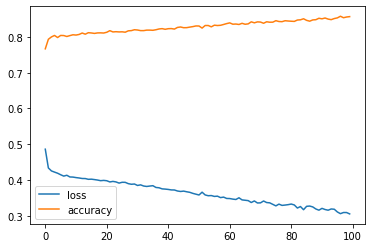

In [176]:
pd.DataFrame(history.history).plot()

In [177]:
tf.random.set_seed(54)

model_2 = tf.keras.Sequential() 
model_2.add(tf.keras.layers.Dense(50, activation='relu'))
model_2.add(tf.keras.layers.Dense(100, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(69, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(100, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(69, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(1 , activation = 'sigmoid'))

model_2.compile(
    loss='binary_crossentropy' , 
    optimizer = 'Adam',
    metrics=['accuracy']
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_2.fit(scale_X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
204/204 [==============================] - 3s 4ms/step - loss: 0.6096 - accuracy: 0.7159 - lr: 1.0000e-04
Epoch 2/100
204/204 [==============================] - 1s 4ms/step - loss: 0.4643 - accuracy: 0.7828 - lr: 1.1220e-04
Epoch 3/100
204/204 [==============================] - 1s 4ms/step - loss: 0.4396 - accuracy: 0.7928 - lr: 1.2589e-04
Epoch 4/100
204/204 [==============================] - 1s 4ms/step - loss: 0.4311 - accuracy: 0.7983 - lr: 1.4125e-04
Epoch 5/100
204/204 [==============================] - 1s 4ms/step - loss: 0.4271 - accuracy: 0.7997 - lr: 1.5849e-04
Epoch 6/100
204/204 [==============================] - 1s 4ms/step - loss: 0.4241 - accuracy: 0.8015 - lr: 1.7783e-04
Epoch 7/100
204/204 [==============================] - 1s 4ms/step - loss: 0.4212 - accuracy: 0.8015 - lr: 1.9953e-04
Epoch 8/100
204/204 [==============================] - 1s 4ms/step - loss: 0.4206 - accuracy: 0.8012 - lr: 2.2387e-04
Epoch 9/100
204/204 [==============================] - 1

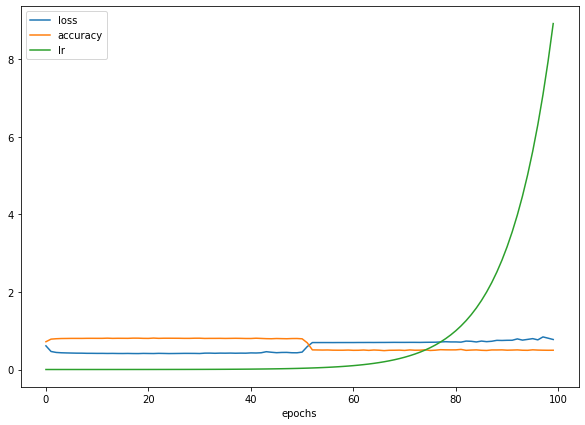

In [178]:
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

In [179]:
# Epoch 18/100
# 204/204 [==============================] - 1s 4ms/step - loss: 0.4105 - accuracy: 0.8076 - lr: 7.0795e-04
tf.random.set_seed(54)

model_2 = tf.keras.Sequential() 
model_2.add(tf.keras.layers.Dense(50, activation='relu'))
model_2.add(tf.keras.layers.Dense(100, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(69, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(100, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(69, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(1 , activation = 'sigmoid'))

model_2.compile(
    loss='binary_crossentropy' , 
    optimizer = tf.keras.optimizers.Adam(learning_rate=7.0795e-04),
    metrics=['accuracy']
)

history = model_2.fit(scale_X_train, y_train, epochs=500)

Epoch 1/500
204/204 [==============================] - 3s 4ms/step - loss: 0.4850 - accuracy: 0.7747
Epoch 2/500
204/204 [==============================] - 1s 4ms/step - loss: 0.4354 - accuracy: 0.7952
Epoch 3/500
204/204 [==============================] - 1s 4ms/step - loss: 0.4284 - accuracy: 0.8000
Epoch 4/500
204/204 [==============================] - 1s 4ms/step - loss: 0.4230 - accuracy: 0.8004
Epoch 5/500
204/204 [==============================] - 1s 4ms/step - loss: 0.4201 - accuracy: 0.8030
Epoch 6/500
204/204 [==============================] - 1s 4ms/step - loss: 0.4164 - accuracy: 0.8058
Epoch 7/500
204/204 [==============================] - 1s 4ms/step - loss: 0.4129 - accuracy: 0.8038
Epoch 8/500
204/204 [==============================] - 1s 4ms/step - loss: 0.4127 - accuracy: 0.8046
Epoch 9/500
204/204 [==============================] - 1s 5ms/step - loss: 0.4093 - accuracy: 0.8064
Epoch 10/500
204/204 [==============================] - 1s 5ms/step - loss: 0.4093 - accura

In [180]:
# Epoch 19/100
# 204/204 [==============================] - 1s 4ms/step - loss: 0.4091 - accuracy: 0.8081 - lr: 7.9433e-04
tf.random.set_seed(54)

model_2 = tf.keras.Sequential() 
model_2.add(tf.keras.layers.Dense(50, activation='relu'))
model_2.add(tf.keras.layers.Dense(100, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(69, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(100, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(69, activation = 'relu'))
model_2.add(tf.keras.layers.Dense(1 , activation = 'sigmoid'))

model_2.compile(
    loss='binary_crossentropy' , 
    optimizer = tf.keras.optimizers.Adam(learning_rate=7.9433e-04),
    metrics=['accuracy']
)

history = model_2.fit(X_scaled, y, epochs=500)

Epoch 1/500
272/272 [==============================] - 3s 4ms/step - loss: 0.4701 - accuracy: 0.7790
Epoch 2/500
272/272 [==============================] - 1s 5ms/step - loss: 0.4319 - accuracy: 0.7962
Epoch 3/500
272/272 [==============================] - 1s 5ms/step - loss: 0.4243 - accuracy: 0.7985
Epoch 4/500
272/272 [==============================] - 1s 4ms/step - loss: 0.4226 - accuracy: 0.8003
Epoch 5/500
272/272 [==============================] - 1s 5ms/step - loss: 0.4175 - accuracy: 0.8052
Epoch 6/500
272/272 [==============================] - 2s 6ms/step - loss: 0.4157 - accuracy: 0.8058
Epoch 7/500
272/272 [==============================] - 1s 4ms/step - loss: 0.4137 - accuracy: 0.8034
Epoch 8/500
272/272 [==============================] - 1s 4ms/step - loss: 0.4129 - accuracy: 0.8052
Epoch 9/500
272/272 [==============================] - 1s 4ms/step - loss: 0.4110 - accuracy: 0.8061
Epoch 10/500
272/272 [==============================] - 1s 4ms/step - loss: 0.4112 - accura

> Our final model's accuracy is 90.43% on the complete dataset.

In [181]:
X_final_test = pd.read_csv('./test.csv')

In [182]:
X_final_test.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [183]:
X_final_test.drop(['PassengerId', 'Cabin','Name'], axis=1, inplace=True)

In [184]:
homePlanet = LabelEncoder().fit_transform(X_final_test['HomePlanet'])
destination = LabelEncoder().fit_transform(X_final_test['Destination'])

In [185]:
X_final_test['HomePlanet'] = homePlanet
X_final_test['Destination'] = destination

In [186]:
scale_X_final_test = scalar.transform(X_final_test)

In [187]:
y_probs = model_2.predict(scale_X_final_test)

134/134 [==============================] - 0s 2ms/step


In [188]:
y_preds = np.round(y_probs).astype(bool)

In [189]:
X_final_test = pd.read_csv('./test.csv')

In [190]:
final = pd.DataFrame(X_final_test['PassengerId'])

In [191]:
final['Transported'] = y_preds

In [192]:
final.head()

PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True

In [193]:
final.to_csv('final_submission.csv')

In [194]:
import pickle
pickle.dump(model_2, open('model.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dense_4
.........vars
............0
............1
......dense_5
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                 